<a href="https://colab.research.google.com/github/Varun0801/Deep_Learning_Essentials/blob/master/Cifar10_Multiclass_DNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf                       # deep learning library
import numpy as np                            # for matrix operations
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
x_test


array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1


In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)



Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 1.5547 - accuracy: 0.4257 - val_loss: 1.3576 - val_accuracy: 0.5180
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 1.1612 - accuracy: 0.5864 - val_loss: 1.1272 - val_accuracy: 0.6048
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 0.9984 - accuracy: 0.6478 - val_loss: 1.0283 - val_accuracy: 0.6467
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.8752 - accuracy: 0.6919 - val_loss: 0.9421 - val_accuracy: 0.6750
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.7773 - accuracy: 0.7282 - val_loss: 0.9140 - val_accuracy: 0.6868
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.6943 - accuracy: 0.7583 - val_loss: 0.9376 - val_accuracy: 0.6797
Epoch 7/100
800/800 [==============================] - 3s 3ms/step - loss: 0.6164 - accuracy: 0.7842 - val_loss: 0.8907 - val_accuracy: 0.6992

In [ ]:
# Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.964468002319336 / Test accuracy: 0.696399986743927


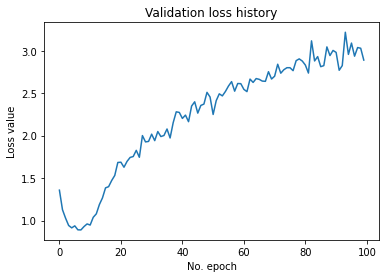

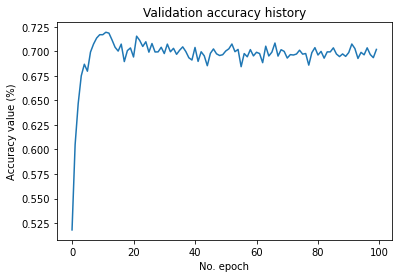

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,156,186,205,153,183,201,153,183,201,152,182,201,152,184,201,149,181,199,146,178,195,152,184,201,149,181,198,147,177,198,155,186,203,143,174,186,135,166,180,153,...,57,24,48,60,27,56,69,30,62,79,32,63,79,37,64,76,33,57,72,36,61,79,37,65,83,35,67,86,36,72,90,40,73,92,49,79,99,46,77,97
1996,68,101,169,69,103,173,70,104,176,71,104,178,73,106,182,77,110,186,81,115,189,85,119,192,89,123,196,92,127,199,97,131,204,102,136,209,112,138,211,107,...,88,65,71,70,57,63,61,49,55,53,65,72,70,68,75,72,58,64,62,43,52,47,40,52,43,45,57,48,56,67,58,61,73,64,51,62,53,49,61,52
1997,216,190,168,219,193,169,214,189,163,188,158,126,157,121,87,143,109,84,133,101,83,127,92,71,119,87,64,151,127,103,201,182,165,173,148,128,132,103,80,140,...,104,184,150,108,180,146,104,173,136,96,170,133,93,150,118,84,134,112,89,149,130,110,171,151,126,174,154,127,179,160,135,182,167,150,184,170,152,188,171,151
1998,46,24,17,43,32,11,77,82,60,117,139,134,115,147,145,123,150,143,136,157,144,139,155,139,141,153,141,148,160,150,154,166,156,151,163,153,155,168,158,156,...,153,104,135,152,102,137,152,98,134,149,102,134,151,102,135,152,104,136,153,103,135,152,105,137,151,104,136,149,102,134,147,102,134,146,100,131,145,99,130,148


In [ ]:
test_data = test_data/255
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.384314,0.411765,0.423529,0.360784,0.396078,0.415686,0.356863,0.396078,0.419608,0.364706,0.407843,0.423529,0.349020,0.392157,0.407843,0.345098,0.388235,0.403922,0.352941,0.396078,0.415686,0.372549,0.411765,0.431373,0.388235,0.423529,0.431373,0.427451,0.458824,0.454902,0.466667,0.490196,0.482353,0.490196,0.509804,0.501961,0.525490,0.549020,0.541176,0.549020,...,0.721569,0.698039,0.694118,0.674510,0.745098,0.737255,0.721569,0.862745,0.858824,0.839216,0.764706,0.756863,0.733333,0.690196,0.682353,0.662745,0.686275,0.678431,0.658824,0.752941,0.741176,0.725490,0.725490,0.713725,0.698039,0.658824,0.647059,0.631373,0.698039,0.690196,0.670588,0.717647,0.713725,0.690196,0.686275,0.686275,0.658824,0.709804,0.709804,0.686275
1,0.396078,0.423529,0.396078,0.396078,0.423529,0.396078,0.400000,0.427451,0.400000,0.403922,0.431373,0.403922,0.411765,0.439216,0.407843,0.411765,0.447059,0.427451,0.411765,0.454902,0.439216,0.415686,0.450980,0.431373,0.423529,0.450980,0.423529,0.419608,0.450980,0.419608,0.407843,0.450980,0.415686,0.407843,0.454902,0.423529,0.423529,0.466667,0.450980,0.423529,...,0.584314,0.600000,0.623529,0.643137,0.517647,0.549020,0.556863,0.525490,0.564706,0.568627,0.439216,0.466667,0.462745,0.423529,0.450980,0.435294,0.447059,0.486275,0.478431,0.415686,0.462745,0.454902,0.396078,0.443137,0.423529,0.392157,0.435294,0.400000,0.388235,0.431373,0.403922,0.392157,0.427451,0.407843,0.392157,0.427451,0.403922,0.392157,0.427451,0.400000
2,0.333333,0.450980,0.105882,0.247059,0.352941,0.098039,0.145098,0.258824,0.058824,0.270588,0.364706,0.192157,0.156863,0.203922,0.141176,0.070588,0.094118,0.070588,0.121569,0.149020,0.105882,0.309804,0.356863,0.239216,0.407843,0.458824,0.305882,0.282353,0.329412,0.203922,0.266667,0.309804,0.203922,0.478431,0.513725,0.333333,0.407843,0.443137,0.262745,0.301961,...,0.545098,0.682353,0.737255,0.545098,0.713725,0.776471,0.588235,0.701961,0.760784,0.576471,0.686275,0.729412,0.556863,0.733333,0.764706,0.619608,0.690196,0.749020,0.556863,0.662745,0.745098,0.517647,0.694118,0.756863,0.564706,0.705882,0.741176,0.576471,0.686275,0.745098,0.552941,0.674510,0.756863,0.533333,0.678431,0.752941,0.541176,0.701961,0.752941,0.584314
3,0.835294,0.835294,0.839216,0.843137,0.839216,0.854902,0.862745,0.854902,0.886275,0.874510,0.866667,0.913725,0.886275,0.882353,0.905882,0.882353,0.886275,0.874510,0.874510,0.874510,0.874510,0.890196,0.886275,0.905882,0.898039,0.894118,0.925490,0.898039,0.894118,0.925490,0.901961,0.898039,0.925490,0.894118,0.890196,0.921569,0.890196,0.886275,0.917647,0.882353,...,0.078431,0.435294,0.160784,0.109804,0.435294,0.247059,0.235294,0.470588,0.360784,0.384314,0.541176,0.458824,0.505882,0.600000,0.549020,0.619608,0.674510,0.631373,0.733333,0.737255,0.682353,0.803922,0.764706,0.713725,0.831373,0.780392,0.725490,0.847059,0.772549,0.729412,0.847059,0.756863,0.760784,0.819608,0.788235,0.800000,0.847059,0.796078,0.788235,0.929412
4,0.160784,0.290196,0.564706,0.160784,0.294118,0.545098,0.160784,0.294118,0.545098,0.160784,0.290196,0.564706,0.152941,0.298039,0.549020,0.145098,0.309804,0.509804,0.149020,0.301961,0.529412,0.156863,0.294118,0.556863,0.168627,0.282353,0.568627,0.184314,0.278431,0.572549,0.184314,0.286275,0.549020,0.168627,0.294118,0.549020,0.152941,0.301961,0.560784,0.145098,...,0.584314,0.164706,0.278431,0.529412,0.168627,0.282353,0.490196,0.164706,0.282353,0.478431,0.200000,0.282353,0.458824,0.250980,0.274510,0.427451,0.254902,0.282353,0.388235,0.207843,0.298039,0.443137,0.137255,0.294118,0.533333,0.117647,0.317647,0.549020,0.133333,0.309804,0.521569,0.160784,0.301961,0.509804,0.172549,0.294118,0.521569,0.164706,0.286275,0.564706
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
test_data1 = pd.DataFrame(test_data)
test_data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.384314,0.411765,0.423529,0.360784,0.396078,0.415686,0.356863,0.396078,0.419608,0.364706,0.407843,0.423529,0.349020,0.392157,0.407843,0.345098,0.388235,0.403922,0.352941,0.396078,0.415686,0.372549,0.411765,0.431373,0.388235,0.423529,0.431373,0.427451,0.458824,0.454902,0.466667,0.490196,0.482353,0.490196,0.509804,0.501961,0.525490,0.549020,0.541176,0.549020,...,0.721569,0.698039,0.694118,0.674510,0.745098,0.737255,0.721569,0.862745,0.858824,0.839216,0.764706,0.756863,0.733333,0.690196,0.682353,0.662745,0.686275,0.678431,0.658824,0.752941,0.741176,0.725490,0.725490,0.713725,0.698039,0.658824,0.647059,0.631373,0.698039,0.690196,0.670588,0.717647,0.713725,0.690196,0.686275,0.686275,0.658824,0.709804,0.709804,0.686275
1,0.396078,0.423529,0.396078,0.396078,0.423529,0.396078,0.400000,0.427451,0.400000,0.403922,0.431373,0.403922,0.411765,0.439216,0.407843,0.411765,0.447059,0.427451,0.411765,0.454902,0.439216,0.415686,0.450980,0.431373,0.423529,0.450980,0.423529,0.419608,0.450980,0.419608,0.407843,0.450980,0.415686,0.407843,0.454902,0.423529,0.423529,0.466667,0.450980,0.423529,...,0.584314,0.600000,0.623529,0.643137,0.517647,0.549020,0.556863,0.525490,0.564706,0.568627,0.439216,0.466667,0.462745,0.423529,0.450980,0.435294,0.447059,0.486275,0.478431,0.415686,0.462745,0.454902,0.396078,0.443137,0.423529,0.392157,0.435294,0.400000,0.388235,0.431373,0.403922,0.392157,0.427451,0.407843,0.392157,0.427451,0.403922,0.392157,0.427451,0.400000
2,0.333333,0.450980,0.105882,0.247059,0.352941,0.098039,0.145098,0.258824,0.058824,0.270588,0.364706,0.192157,0.156863,0.203922,0.141176,0.070588,0.094118,0.070588,0.121569,0.149020,0.105882,0.309804,0.356863,0.239216,0.407843,0.458824,0.305882,0.282353,0.329412,0.203922,0.266667,0.309804,0.203922,0.478431,0.513725,0.333333,0.407843,0.443137,0.262745,0.301961,...,0.545098,0.682353,0.737255,0.545098,0.713725,0.776471,0.588235,0.701961,0.760784,0.576471,0.686275,0.729412,0.556863,0.733333,0.764706,0.619608,0.690196,0.749020,0.556863,0.662745,0.745098,0.517647,0.694118,0.756863,0.564706,0.705882,0.741176,0.576471,0.686275,0.745098,0.552941,0.674510,0.756863,0.533333,0.678431,0.752941,0.541176,0.701961,0.752941,0.584314
3,0.835294,0.835294,0.839216,0.843137,0.839216,0.854902,0.862745,0.854902,0.886275,0.874510,0.866667,0.913725,0.886275,0.882353,0.905882,0.882353,0.886275,0.874510,0.874510,0.874510,0.874510,0.890196,0.886275,0.905882,0.898039,0.894118,0.925490,0.898039,0.894118,0.925490,0.901961,0.898039,0.925490,0.894118,0.890196,0.921569,0.890196,0.886275,0.917647,0.882353,...,0.078431,0.435294,0.160784,0.109804,0.435294,0.247059,0.235294,0.470588,0.360784,0.384314,0.541176,0.458824,0.505882,0.600000,0.549020,0.619608,0.674510,0.631373,0.733333,0.737255,0.682353,0.803922,0.764706,0.713725,0.831373,0.780392,0.725490,0.847059,0.772549,0.729412,0.847059,0.756863,0.760784,0.819608,0.788235,0.800000,0.847059,0.796078,0.788235,0.929412
4,0.160784,0.290196,0.564706,0.160784,0.294118,0.545098,0.160784,0.294118,0.545098,0.160784,0.290196,0.564706,0.152941,0.298039,0.549020,0.145098,0.309804,0.509804,0.149020,0.301961,0.529412,0.156863,0.294118,0.556863,0.168627,0.282353,0.568627,0.184314,0.278431,0.572549,0.184314,0.286275,0.549020,0.168627,0.294118,0.549020,0.152941,0.301961,0.560784,0.145098,...,0.584314,0.164706,0.278431,0.529412,0.168627,0.282353,0.490196,0.164706,0.282353,0.478431,0.200000,0.282353,0.458824,0.250980,0.274510,0.427451,0.254902,0.282353,0.388235,0.207843,0.298039,0.443137,0.137255,0.294118,0.533333,0.117647,0.317647,0.549020,0.133333,0.309804,0.521569,0.160784,0.301961,0.509804,0.172549,0.294118,0.521569,0.164706,0.286275,0.564706
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
test_data2 = test_data1.to_numpy()
test_data2
print(test_data2.shape)

(2000, 3072)


In [ ]:
test_data3 = np.reshape(test_data2,(2000,32,32,3))
test_data3

array([[[[0.38431373, 0.41176471, 0.42352941],
         [0.36078431, 0.39607843, 0.41568627],
         [0.35686275, 0.39607843, 0.41960784],
         ...,
         [0.61568627, 0.61568627, 0.57254902],
         [0.6745098 , 0.67058824, 0.62352941],
         [0.76470588, 0.75294118, 0.70196078]],

        [[0.39215686, 0.41568627, 0.42745098],
         [0.36078431, 0.38823529, 0.40784314],
         [0.35294118, 0.38823529, 0.40784314],
         ...,
         [0.65882353, 0.65490196, 0.60784314],
         [0.69019608, 0.67843137, 0.63137255],
         [0.76470588, 0.74509804, 0.69411765]],

        [[0.41960784, 0.43529412, 0.44705882],
         [0.38431373, 0.40784314, 0.41960784],
         [0.35686275, 0.39215686, 0.40392157],
         ...,
         [0.7254902 , 0.71764706, 0.66666667],
         [0.71372549, 0.69803922, 0.65098039],
         [0.7372549 , 0.71372549, 0.65490196]],

        ...,

        [[0.39607843, 0.38823529, 0.34901961],
         [0.34901961, 0.34509804, 0.30196078]

In [ ]:
y_predicted = model.predict(test_data3)
y_predicted


array([[3.6257492e-07, 1.3377302e-13, 9.9999964e-01, ..., 6.3351098e-15,
        2.3667192e-12, 2.6790151e-10],
       [2.9969409e-11, 1.0546833e-11, 6.3815957e-09, ..., 6.5580963e-10,
        2.9518923e-10, 3.7531478e-10],
       [1.3919282e-16, 2.5182682e-21, 2.1385983e-12, ..., 1.7922278e-01,
        1.0114341e-16, 3.5070506e-20],
       ...,
       [3.2269185e-07, 7.9551060e-11, 4.1159281e-05, ..., 2.6480430e-08,
        3.8970490e-11, 6.8106340e-11],
       [1.5665668e-03, 3.2478759e-08, 6.7056039e-06, ..., 2.5204667e-08,
        3.1692371e-06, 9.8196666e-05],
       [6.7459489e-08, 7.7112304e-08, 3.3296192e-06, ..., 1.9295081e-07,
        5.0657597e-08, 4.5267445e-08]], dtype=float32)

In [ ]:
print(y_predicted.shape)

(2000, 10)


In [ ]:
test = y_predicted[0]
test

array([3.6257492e-07, 1.3377302e-13, 9.9999964e-01, 3.6570677e-10,
       2.4337820e-14, 1.8055848e-08, 8.2667269e-09, 6.3351098e-15,
       2.3667192e-12, 2.6790151e-10], dtype=float32)

In [ ]:
ans = np.argmax(test)
ans

2

In [ ]:
print(y_predicted.ndim)

2


In [ ]:
print(y_predicted.shape[0])

2000


In [ ]:
submit = []
for i in range(y_predicted.shape[0]):
  test = y_predicted[i]
  b = np.argmax(test)
  submit.append(b)
print(submit)
print(len(submit))
target = submit
print(target)

[2, 3, 4, 8, 5, 1, 3, 7, 3, 5, 8, 1, 3, 1, 3, 7, 0, 9, 0, 6, 4, 9, 7, 8, 4, 0, 8, 7, 0, 7, 7, 5, 2, 4, 2, 0, 6, 4, 8, 4, 3, 2, 7, 1, 4, 3, 5, 2, 4, 4, 4, 8, 7, 5, 8, 1, 1, 6, 1, 0, 7, 1, 7, 6, 1, 1, 8, 8, 3, 1, 6, 6, 9, 5, 3, 0, 4, 6, 7, 1, 4, 5, 8, 9, 1, 7, 5, 6, 2, 2, 6, 3, 9, 8, 1, 8, 9, 7, 6, 6, 8, 5, 6, 7, 0, 9, 4, 5, 5, 0, 3, 3, 9, 0, 1, 4, 6, 5, 9, 2, 9, 6, 1, 0, 6, 3, 2, 8, 1, 0, 4, 2, 0, 0, 3, 7, 9, 4, 9, 4, 7, 1, 5, 4, 4, 6, 5, 8, 1, 0, 5, 4, 2, 0, 5, 5, 2, 5, 2, 3, 4, 2, 9, 8, 7, 7, 6, 1, 8, 1, 2, 9, 9, 2, 1, 6, 0, 2, 6, 7, 2, 3, 2, 0, 0, 6, 2, 7, 4, 3, 6, 8, 0, 5, 6, 0, 4, 6, 8, 1, 1, 6, 2, 6, 8, 0, 9, 0, 0, 3, 2, 8, 1, 5, 6, 8, 2, 2, 1, 2, 4, 4, 3, 7, 3, 7, 6, 0, 6, 5, 2, 6, 6, 1, 9, 8, 8, 8, 0, 7, 9, 7, 0, 5, 2, 4, 7, 4, 6, 1, 8, 8, 8, 9, 6, 3, 2, 8, 0, 2, 4, 0, 2, 1, 8, 3, 8, 1, 0, 2, 8, 8, 8, 9, 3, 6, 1, 6, 7, 1, 8, 4, 6, 1, 0, 0, 4, 4, 1, 4, 3, 4, 0, 1, 0, 1, 8, 4, 9, 0, 2, 3, 4, 0, 0, 4, 7, 9, 5, 9, 2, 3, 5, 1, 1, 3, 2, 3, 9, 9, 5, 9, 1, 9, 4, 9, 9, 1, 8, 8, 9, 6, 8, 

In [70]:
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test_new.index  # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")      # the csv file will be saved locally on the same location where this notebook is located.